In [ ]:
### Business Understanding and Analytic Approach->Predict mpg(kmpl) -> Target column is mpg -> Regression

In [ ]:
### Data Understanding
# Step 1: Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/auto-mpg.csv")

In [ ]:
### Display 10 sample records
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
345,35.1,4,81.0,60,1760,16.1,81,3,honda civic 1300
199,20.0,6,225.0,100,3651,17.7,76,1,dodge aspen se
314,26.4,4,140.0,88,2870,18.1,80,1,ford fairmont
349,34.1,4,91.0,68,1985,16.0,81,3,mazda glc 4
355,33.7,4,107.0,75,2210,14.4,81,3,honda prelude
313,28.0,4,151.0,90,2678,16.5,80,1,chevrolet citation
241,22.0,6,146.0,97,2815,14.5,77,3,datsun 810
136,16.0,8,302.0,140,4141,14.0,74,1,ford gran torino
124,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510


In [ ]:
### no.rows and columns
df.shape

(398, 9)

In [ ]:
### Descriptive analytics(Both the codes)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Why Horsepower is missing?

In [ ]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


Maybe Horsepower is categorical

Carname has 305 unique values.Its meaningless to have this data anymore

In [ ]:
### Drop car name and check the shape
df=df.drop("car name",axis=1)

In [ ]:
df.shape

(398, 8)

In [ ]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
### Howmany ? in horsepower
len(df[df["horsepower"]=='?'])

6

In [ ]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)

In [ ]:
df["horsepower"]=pd.to_numeric(df["horsepower"])

In [ ]:
median=df["horsepower"].median()
median

93.5

In [ ]:
### Replace these ? with median
df["horsepower"]=df["horsepower"].replace(np.nan,median)

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


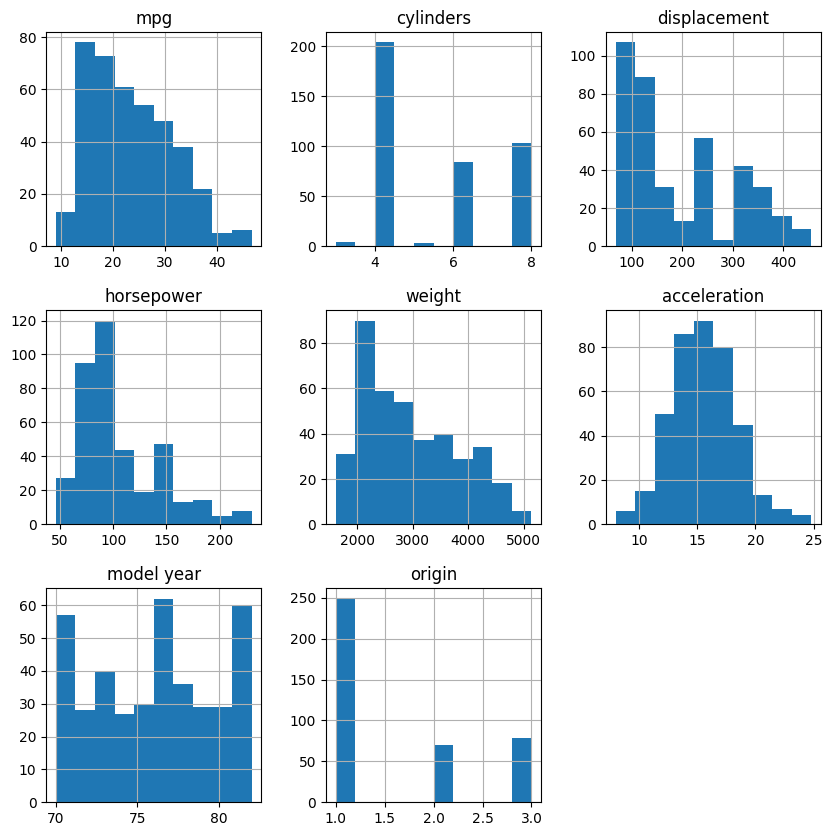

In [ ]:
### hist
df.hist(figsize=(10,10))
plt.show()

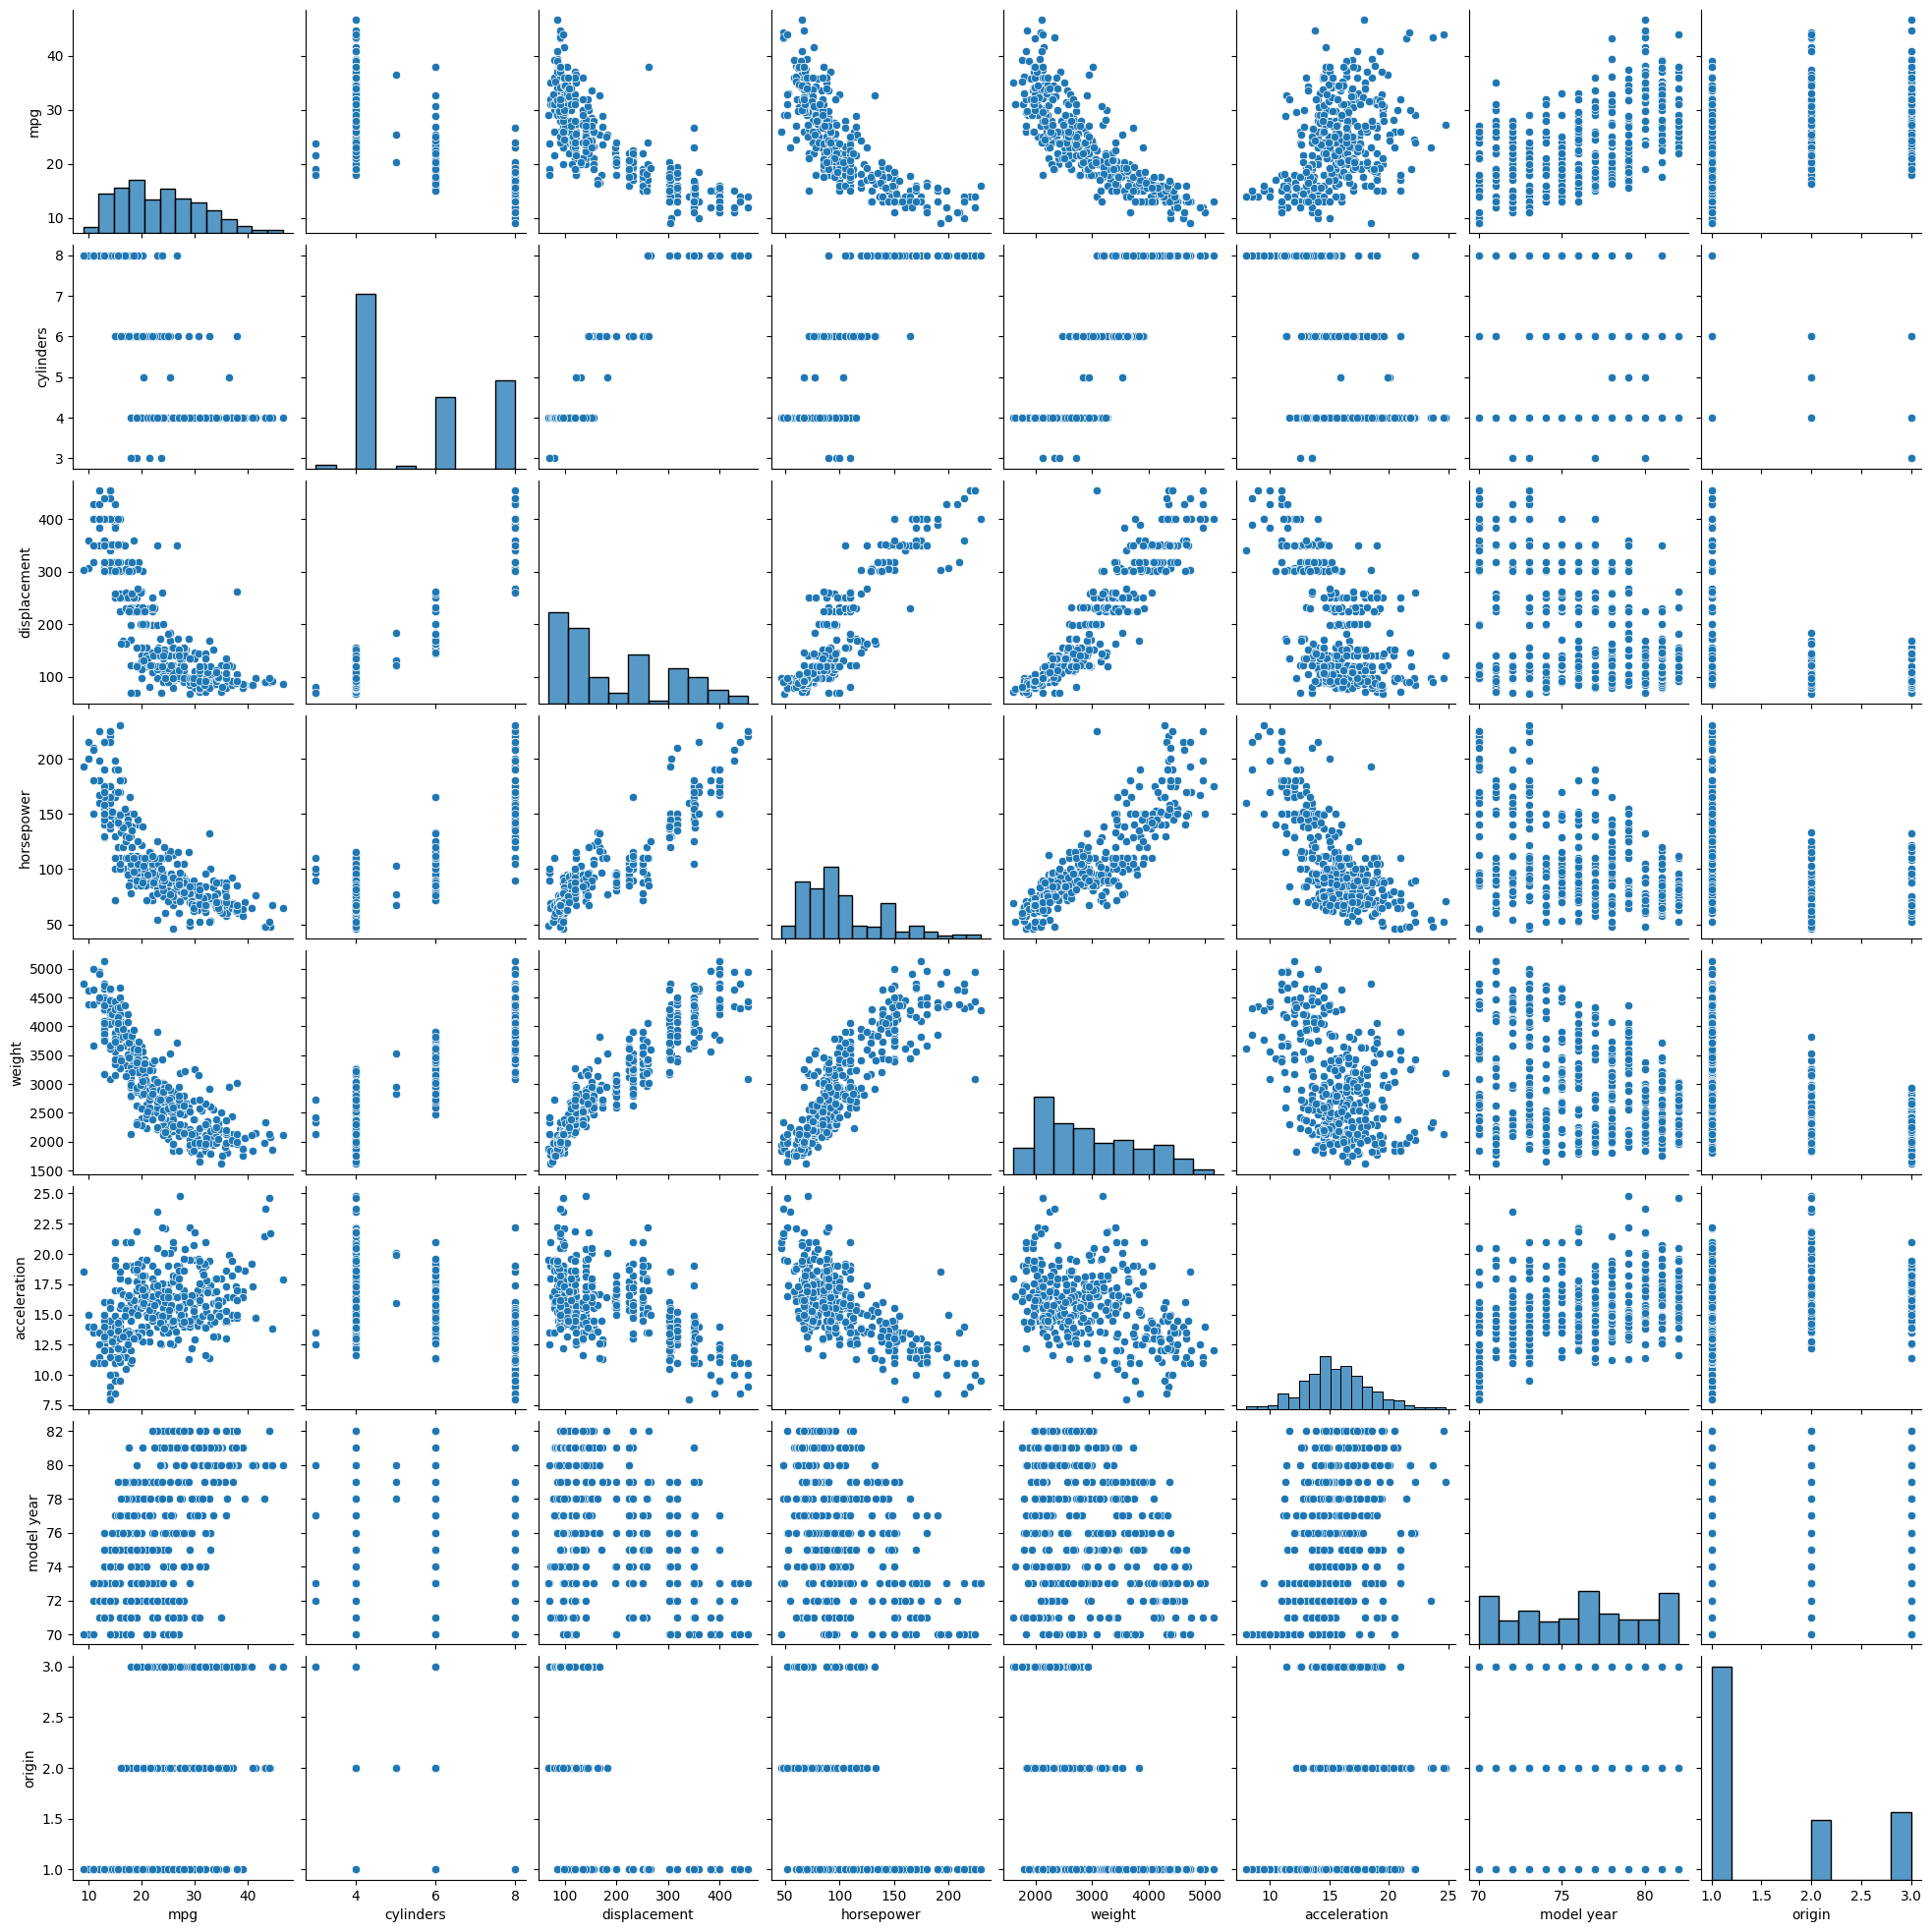

In [ ]:
### Correlation -> Pairplot
sns.pairplot(df)

In [ ]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


<Axes: >

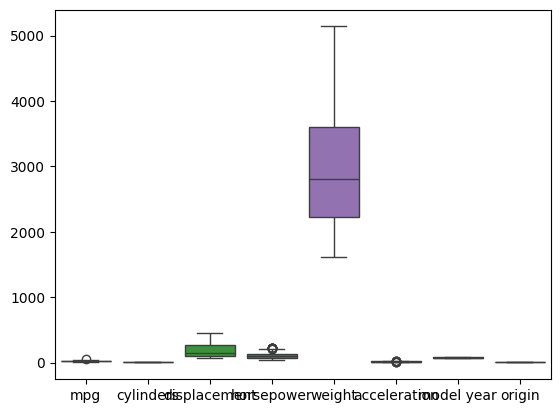

In [ ]:
# Boxplot for entire dataframe
sns.boxplot(df)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
### Conditions-> No mv,no insignificant columns,no obj datatypes
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
### Modelling and Evaluation
Y=df[["mpg"]]
X=df.drop("mpg",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression() #instantiate
model_lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_lr.score(X_train,Y_train)

0.8186016841225254

In [ ]:
model_lr.score(X_test,Y_test)

0.8180285714606905

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_kn=KNeighborsRegressor(n_neighbors=35)
model_kn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=35)

In [ ]:
model_kn.score(X_train,Y_train)

0.7370052487565244

In [ ]:
model_kn.score(X_test,Y_test)

0.6963840751740646

In [ ]:
### Top 3 hyperparameters for KNN Regressor(Browse)

🔑 Top 3 Hyperparameters for KNN Regressor
1️⃣ n_neighbors ⭐ (MOST IMPORTANT)
Number of nearest data points used for prediction
Impact:
Small value → low bias, high variance (overfitting)
Large value → high bias, low variance (underfitting)
KNeighborsRegressor(n_neighbors=5)

2️⃣ weights
Determines how neighbors contribute to prediction
Options:
'uniform' → all neighbors equal weight
'distance' → closer neighbors have more influence
KNeighborsRegressor(weights='distance')
👉 'distance' works better when closer points are more relevant
3️⃣ metric (Distance Measure)
Defines how distance between points is calculated
Common metrics:
'euclidean' (default)

KNN is not helpful for this dataset

In [ ]:
from sklearn.svm import SVR
model_svr=SVR(C=1.5)
model_svr.fit(X_train,Y_train)
print(model_svr.score(X_train,Y_train))
print(model_svr.score(X_test,Y_test))

0.6965739683166181
0.6798275003060412


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tweak the model #kernel ,c,gamma

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(max_depth=3)
model_dt.fit(X_train,Y_train)
print(model_dt.score(X_train,Y_train))
print(model_dt.score(X_test,Y_test))

0.8483634913124904
0.8189050818789664


max_depth,minsamplesplit,minsampleleaf

In [ ]:
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor


### Complete the remaining models

In [ ]:
##ab-> 0.83,0.80   #rf-> 0.91,0.85